{'Dyskeratotic': 223, 'Koilocytotic': 238, 'Metaplastic': 271, 'Parabasal': 108, 'Superficial-Intermediate': 126}
Dyskeratotic :
Total images:  813
Training:  569
Validation:  122
Testing:  122

Koilocytotic :
Total images:  825
Training:  577
Validation:  124
Testing:  124

Metaplastic :
Total images:  793
Training:  555
Validation:  119
Testing:  119

Parabasal :
Total images:  787
Training:  550
Validation:  118
Testing:  119

Superficial-Intermediate :
Total images:  831
Training:  581
Validation:  125
Testing:  125

Found 2832 images belonging to 5 classes.
Found 608 images belonging to 5 classes.
Found 609 images belonging to 5 classes.
Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 1.6054 - accuracy: 0.3038
Epoch 1: val_accuracy improved from -inf to 0.46833, saving model to cervical_cancer_best_model1.hdf5
28/28 [==============================] - 17s 596ms/step - loss: 1.6054 - accuracy: 0.3038 - val_loss: 1.3423 - val_accuracy: 0.4683 - lr: 0.0010
Epoch 2/

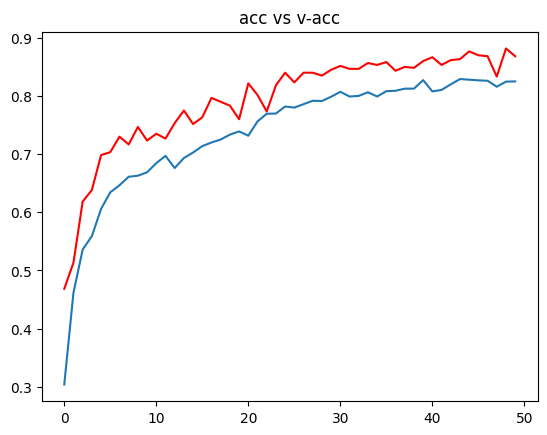

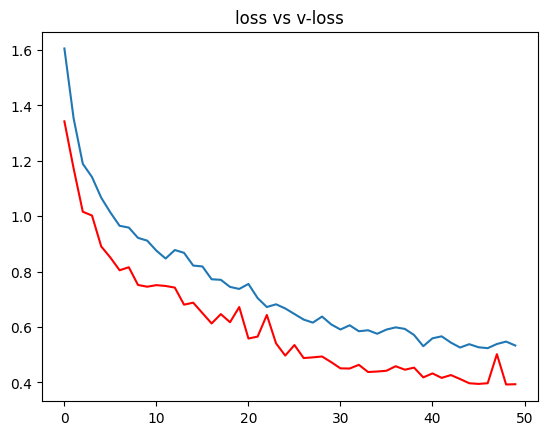

7/7 [==============================] - 0s 37ms/step


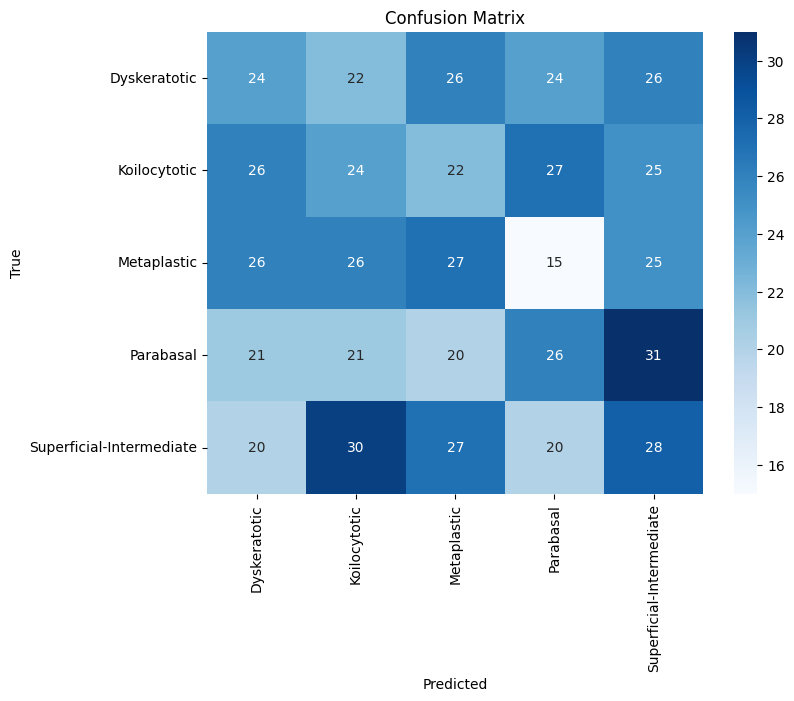

Accuracy: 21.18%
                          precision    recall  f1-score   support

            Dyskeratotic       0.21      0.20      0.20       122
            Koilocytotic       0.20      0.19      0.19       124
             Metaplastic       0.22      0.23      0.22       119
               Parabasal       0.23      0.22      0.23       119
Superficial-Intermediate       0.21      0.22      0.22       125

                accuracy                           0.21       609
               macro avg       0.21      0.21      0.21       609
            weighted avg       0.21      0.21      0.21       609



In [10]:
# Import necessary libraries

import cv2
import os
import shutil 
import math
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

warnings.filterwarnings("ignore")

# Function for Formatting Dataset
def FormatDataset(dataset_src, dataset_dest, classes):
    # Making a Copy of Dataset
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes]
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes]
    cropped_src = [os.path.join(dataset_src, "im_" + cls, "im_" + cls, 'CROPPED') for cls in classes]
    complete_src = [os.path.join(dataset_src, "im_" + cls, "im_" + cls) for cls in classes]
    for (dest1, dest2) in zip(new_cropped_dest, new_complete_dest):
        os.makedirs(dest1)
        os.makedirs(dest2)
    # Formatting Cropped Images
    for (src, new_dest) in zip(cropped_src, new_cropped_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file)
            if file_ext == '.bmp':
                img_des = os.path.join(new_dest, filename + '.jpg')
                img = cv2.imread(os.path.join(src, file))
                img = cv2.resize(img, (64, 64))
                img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
                img = cv2.blur(img, (2, 2))
                cv2.imwrite(img_des, img)
    # Formatting Complete Images
    for (src, new_dest) in zip(complete_src, new_complete_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file)
            if file_ext == '.bmp':
                img_des = os.path.join(new_dest, filename + '.jpg')
                img = cv2.imread(os.path.join(src, file))
                img = cv2.resize(img, (256, 256))
                img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)
                img = cv2.blur(img, (2, 2))
                cv2.imwrite(img_des, img)

# Source Location for Dataset
src = 'F:/test/input/cervical-cancer-largest-dataset-sipakmed'
# Destination Location for Dataset
dest = 'F:/test/CervicalCancer'
# Image Classes
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]
# Formatting Dataset
FormatDataset(src, dest, classes)
root_dir = "F:/test/CervicalCancer"
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

# Define a function to get the dataset size
def GetDatasetSize(path, classes, main="CROPPED"):
    num_of_image = {}
    for cls in classes:
        # Counting the Number of Files in the Folder
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)))
    return num_of_image

print(GetDatasetSize(root_dir, classes, "COMPLETE"))

# Function for Creating Train / Validation / Test folders (One time use Only)

def TrainValTestSplit(root_dir, classes_dir, main="CROPPED", val_ratio=0.15, test_ratio=0.15):
    for cls in classes_dir:
        # Creating Split Folders
        os.makedirs('train/' + cls)
        os.makedirs('val/' + cls)
        os.makedirs('test/' + cls)

        # Folder to copy images from
        src = os.path.join(root_dir, cls, main)

        # Splitting the Files in the Given ratio
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * (1 - (val_ratio + test_ratio))), int(len(allFileNames) * (1 - test_ratio))])

        train_FileNames = [os.path.join(src, name) for name in train_FileNames.tolist()]
        val_FileNames = [os.path.join(src, name) for name in val_FileNames.tolist()]
        test_FileNames = [os.path.join(src, name) for name in test_FileNames.tolist()]

        # Printing the Split Details
        print(cls, ':')
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, 'train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, 'val/' + cls)

        for name in test_FileNames:
            shutil.copy(name, 'test/' + cls)
        print()

# Performing Train / Validation / Test Split
root_dir = "./CervicalCancer"  # Dataset Root Folder
classes_dir = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]  # Classes
TrainValTestSplit(root_dir, classes_dir)

# Import Keras for Image Classification
import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

# Define a learning rate scheduler
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 20:
        lr *= 0.5
    return lr

# Create a model with regularization and dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=5, activation='softmax'))

# Compile the model with a custom optimizer and learning rate scheduler
opt = Adam(learning_rate=lr_schedule(0))
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Expand the size of the dataset with new transformed images from the original dataset using ImageDataGenerator.
train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory="F:/test/train", target_size=(64, 64), batch_size=100, class_mode='categorical')
val_data = val_datagen.flow_from_directory(directory="F:/test/val", target_size=(64, 64), batch_size=100, class_mode='categorical')
test_data = test_datagen.flow_from_directory(directory="F:/test/test", target_size=(64, 64), batch_size=100, class_mode='categorical')

# Adding ModelCheckpoint Callback
mc = ModelCheckpoint(filepath="cervical_cancer_best_model1.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Fitting the Model
cnn = model.fit(train_data,
                steps_per_epoch=28,
                epochs=50,  # Increase the number of epochs
                validation_data=val_data,
                validation_steps=6,
                callbacks=[mc, LearningRateScheduler(lr_schedule)])  # Add learning rate scheduler

# Loading the Best Fit Model
model = load_model("cervical_cancer_best_model1.hdf5")

# Checking the Accuracy of the Model
accuracy = model.evaluate(test_data)[1]
print(f"The accuracy of your model is = {accuracy * 100:.2f}%")

# Plot Accuracy in Training Set & Validation Set
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

# Plot Loss in Training Set & Validation Set
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

# Import libraries for evaluation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Generate predictions for the test dataset
y_pred = model.predict(test_data)

# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels from the test dataset generator
y_true = test_data.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate classification report to calculate precision, recall, and F1-score
class_report = classification_report(y_true, y_pred_classes, target_names=classes)
print(class_report)
